In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import csv

In [2]:
data = pd.read_csv('/home/shreevidya/Data/co-combined.csv')
data_1 = data.dropna()

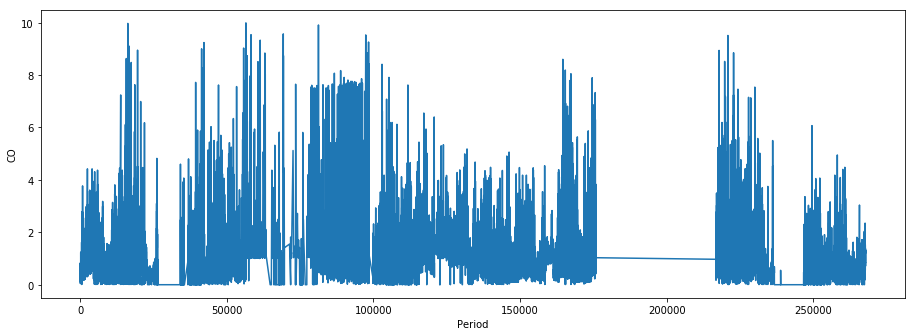

In [3]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)
data_1 = data_1[data_1['CO'] < 10]

plt.plot(data_1['CO']) # 'r' is the color red
plt.xlabel('Period')
plt.ylabel('CO')
#plt.title('String Title Here')
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/home/shreevidya/anaconda3/envs/tfv2/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TypeError: unhashable type: 'numpy.ndarray'

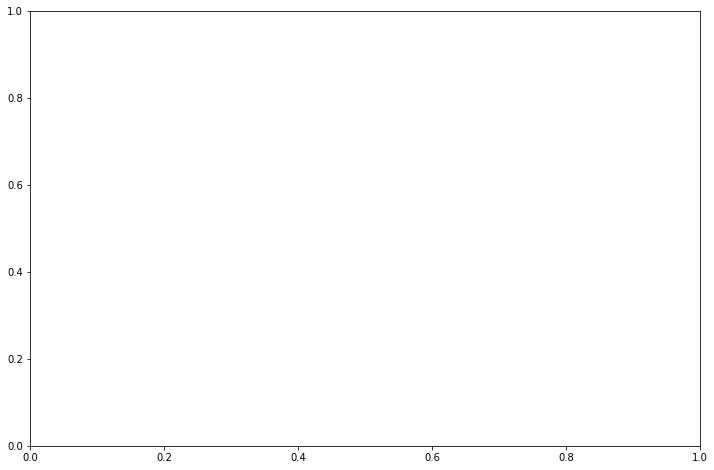

In [5]:
test_stationarity(data_1)

In [ ]:
X = data_1['CO']

In [ ]:
train , test = X.values[:140000], X.values[140000:]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
model = ARIMA(train, order=(3, 1, 5))
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [ ]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)

In [ ]:
for i in range(10):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

In [ ]:
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

In [ ]:
fig, ax = plt.subplots(figsize=(17,8))
#ax.set_title('Prediction vs. Actual after 100 epochs of training')
ax.plot(test[100:400,], label='True Data', color='green')
ax.plot(predictions[101:401], label='Prediction', color='red')
plt.xlabel("Index", fontsize=20)
plt.ylabel("CO Concentration $(\mu gm^{-3})$", fontsize=20)
plt.legend()
plt.savefig("arima_co.pdf")
plt.show()